# Importing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

In [2]:
current_directory = os.getcwd()
raw_data_directory = current_directory + '/raw_data'
raw_data_directory

'/Users/miguel/repos/Prediction_Medicine_Selectivity_Scores/raw_data'

In [3]:
# lo del df_name no tiene sentido si luego no lo puedo llamar

In [4]:
# input raw data from different years (2010-2021)
initial_year = 2010
last_year = 2021
next_year = initial_year + 1
num_years = last_year - initial_year + 1
list_of_dfs = []
list_of_directories = []
# format example: df_2010_2011 = pd.read_csv(raw_data_directory + '/Notas de corte de Medicina 2010_2011 - Hoja 1.csv', decimal = ',')

for i in range(num_years):
    df_name = 'df' + '_' + str(initial_year) + '_' + str(next_year)
    directory = raw_data_directory + '/Notas de corte de Medicina ' + str(initial_year) + '_' + str(next_year) + ' - Hoja 1.csv'
    list_of_dfs.append(df_name)
    list_of_directories.append(directory)
    
    list_of_dfs[i] = pd.read_csv(list_of_directories[i], decimal = ',')
    
    initial_year += 1
    next_year += 1

In [5]:
# before appending all dfs, we create a column with the year, to keep track of which df the data is coming from
initial_year = 2010

for i in range(num_years):
    list_of_dfs[i]['year'] = initial_year + i

In [6]:
dfs_unified = pd.DataFrame()

In [7]:
for i in range(num_years):
    dfs_unified = dfs_unified.append(list_of_dfs[i])

In [8]:
# check the append has been done correctly: check the number of rows is the sum of all of the dfs

total_number_of_rows = 0

for i in range(num_years):
    total_number_of_rows = total_number_of_rows + len(list_of_dfs[i])

if total_number_of_rows != dfs_unified.shape[0]:
    sys.exit()
else:
    print('append has been done correctly')

append has been done correctly


# Data Cleaning

## Check for duplicates

In [9]:
if dfs_unified[dfs_unified.duplicated() == True].shape[0] != 0:
    dfs_unified.drop_duplicates()
else:
    print('There are no duplicates')

There are no duplicates


## Create new unique columns out of data that we already had

In [10]:
def drop_columns_containing_text(df, text):
    '''
    drop columns that contain a certain string/text
    '''
    df = df[df.columns.drop(list(df.filter(regex=text)))]
    return df

In [11]:
dfs_unified = drop_columns_containing_text(dfs_unified, 'Sobre')

In [12]:
# to keep track of raw columns, to afterwards drop them
dfs_unified_raw_columns = dfs_unified.columns.tolist()
# 'year' was created before and is not a raw column
dfs_unified_raw_columns.remove('year')
#dfs_unified_columns

In [13]:
# tiene sentido copiar solo not null data y no toda????????

In [14]:
def copy_data(new_col, old_col):
    '''
    copy not null data from one column to another
    '''
    dfs_unified[new_col] = np.where(dfs_unified[old_col].notnull(), dfs_unified[old_col], dfs_unified[new_col])

In [15]:
dfs_unified['university'] = ''
copy_data('university', 'Notas de corte de Medicina')
copy_data('university', 'Universidad')
copy_data('university', 'Facultad de Medicina')

#dfs_unified['date_last_admission'] = ''
#copy_data('date_last_admission', 'Fecha de última admisión')
#copy_data('date_last_admission', 'Última fecha de admisión \n(Fecha de la nota final)')

dfs_unified['final_grade'] = ''
copy_data('final_grade', 'Nota de corte final de Medicina')
copy_data('final_grade', 'Nota de corte final')
copy_data('final_grade', 'Nota de corte actual')



dfs_unified['1_list'] = ''
copy_data('1_list', '1ª Lista')

#copy_data('19_list', '19ª lista')
#copy_data('20_list', '20ª lista')

In [16]:
# drop all old columns
dfs_unified = dfs_unified.drop(dfs_unified_raw_columns, axis=1)

# reset index
dfs_unified = dfs_unified.reset_index()

In [17]:
dfs_unified[~dfs_unified['university'].str.contains('U', na=False)]

,index,year,university,final_grade,1_list
31,31,2010,,,
33,33,2010,"** Publicada nota de 11,257 en la CiuG, el 7/9/10",,
98,32,2012,Nota promedio,12.017,
99,33,2012,Desviación típica,0.22,
132,32,2013,Nota promedio,12.082,
133,33,2013,Desviación típica,0.213,
166,32,2014,Nota promedio,12.268,
167,33,2014,Desviación típica,0.213,
200,32,2015,Nota promedio,12.422,12.605
201,33,2015,Desviación típica,0.188,0.201


In [18]:
dfs_unified = dfs_unified[dfs_unified['university'].str.contains('U', na=False)]

In [19]:
dfs_unified = dfs_unified[~dfs_unified['university'].str.contains('Sobre la Universidad de Santiago:', na=False)]

In [20]:
dfs_unified.columns

Index(['index', 'year', 'university', 'final_grade', '1_list'], dtype='object')

In [21]:
dfs_unified_columns = dfs_unified.columns.tolist()[1:]

num_columns = len(dfs_unified_columns)

for i in range(num_columns):
    dfs_unified[dfs_unified_columns[i]].replace({'': np.nan}, inplace=True)

In [22]:
# quality check: essential columns don't have nulls

nulls_1_list = dfs_unified[dfs_unified['1_list'].isnull()].shape[0]
nulls_final_grade = dfs_unified[dfs_unified['final_grade'].isnull()].shape[0]
nulls_university = dfs_unified[dfs_unified['university'].isnull()].shape[0]

if nulls_1_list or nulls_final_grade or nulls_university != 0:
    sys.exit()
else:
    print('column 1_list has', nulls_1_list, 'null rows')
    print('column final_grade has', nulls_final_grade, 'null rows')
    print('column university has', nulls_university, 'null rows')

column 1_list has 0 null rows
column final_grade has 0 null rows
column university has 0 null rows


## Create consistent University names across years

In [23]:
dfs_unified['university'] = dfs_unified['university'].str.lower()

In [24]:
last_year = 2021
dfs_unified[dfs_unified['year'] == last_year]['university'].values

array(['universidad complutense de madrid', 'universidad de sevilla',
       'universidad de murcia', 'universidad de granada',
       'u. autónoma de madrid', 'universidad de málaga',
       'universidad de córdoba', 'universidad de cádiz',
       'u. miguel hernández (s. juan de alicante)',
       'u. de c-la mancha (campus c.real)', 'universidad de alcalá',
       'universidad de valladolid', 'urjc - campus alcorcón',
       'u. de c-la mancha (campus albacete)',
       'u. de extremadura (badajoz)', 'universidad pública de navarra',
       'universidad de valencia', 'universidad jaume i',
       'u. de zaragoza (campus zaragoza)',
       'universidad de barcelona-clínico', 'universidad de la laguna',
       'universidad de las palmas', 'universidad de salamanca',
       'u. de zaragoza (campus huesca)', 'u. de santiago de compostela',
       'universidad de oviedo', 'u. de cantabria (santander)',
       'universidad de barcelona-bellvitge',
       'universidad del país vasco (lejon

In [25]:
list_of_uni_names_2021 = dfs_unified[dfs_unified['year'] == last_year]['university'].tolist()
num_of_uni_names_2021 = len(list_of_uni_names_2021)
print('There are', num_of_uni_names_2021, 'universities in 2021')

dfs_unified_list_uni = list(dfs_unified['university'].unique())
num_of_uni_names_dataset = len(dfs_unified_list_uni)
print('There are a total of', num_of_uni_names_dataset, 'universities in our dataset')

diff_uni_names = num_of_uni_names_dataset - num_of_uni_names_2021
print('This means there are a total of', diff_uni_names, 'universities that have a different name than the ones in our 2021 data, and need to be mapped')

There are 35 universities in 2021
There are a total of 48 universities in our dataset
This means there are a total of 13 universities that have a different name than the ones in our 2021 data, and need to be mapped


In [26]:
# we create a list with the universities that have different name

list_not_matched = []

for i in dfs_unified_list_uni:
    if i not in list_of_uni_names_2021:
        list_not_matched.append(i)
    else:
        continue


if len(list_not_matched) != diff_uni_names:
    sys.exit()
else:
    print('list of not matched created successfully')

list_not_matched

list of not matched created successfully


['universidad de zaragoza - campus de huesca',
 'universidad de cantabria (santander)',
 'universidad de santiago de compostela',
 'universidad de extremadura (badajoz)',
 'universidad pompeu fabra (barcelona)',
 'universidad de barcelona',
 'universidad de zaragoza - campus de zaragoza',
 'universidad de clm- campus de ciudad real',
 'universidad de clm- campus de albacete',
 'universidad miguel hernández (san juan de alicante)',
 'universidad rey juan carlos - campus de alcorcón',
 'universidad autónoma de madrid',
 'universidad de jaume i']

### Sequence Matcher

In [27]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [28]:
df1 = pd.DataFrame({
    "not_matched_uni": list_not_matched
})

df2 = pd.DataFrame({
    "list_of_uni_names_2021": list_of_uni_names_2021
})

df3 = pd.MultiIndex.from_product(
    [df1["not_matched_uni"], df2["list_of_uni_names_2021"]], names=["not_matched_uni", "list_of_uni_names_2021"]
).to_frame(index=False)

In [29]:
df3['ratio'] = ''

for i in range(len(df3['not_matched_uni'])):
    df3['ratio'][i] = similar(df3['not_matched_uni'][i], df3['list_of_uni_names_2021'][i])

df3['not_matched_uni'].nunique()

13

In [30]:
df4 = df3.groupby('not_matched_uni')['ratio'].max().reset_index()

df5 = pd.merge(df4,df3,on='not_matched_uni',how='left')
df5 = df5[df5['ratio_x'] == df5['ratio_y']]
df5

,not_matched_uni,ratio_x,list_of_uni_names_2021,ratio_y
31,universidad autónoma de madrid,0.825397,universidad autónoma de barcelona,0.825397
54,universidad de barcelona,0.857143,universidad de barcelona-clínico,0.857143
96,universidad de cantabria (santander),0.825397,u. de cantabria (santander),0.825397
134,universidad de clm- campus de albacete,0.676056,universidad de las islas baleares,0.676056
140,universidad de clm- campus de ciudad real,0.648649,universidad complutense de madrid,0.648649
189,universidad de extremadura (badajoz),0.825397,u. de extremadura (badajoz),0.825397
227,universidad de jaume i,0.926829,universidad jaume i,0.926829
269,universidad de santiago de compostela,0.830769,u. de santiago de compostela,0.830769
303,universidad de zaragoza - campus de huesca,0.750000,u. de zaragoza (campus huesca),0.75
333,universidad de zaragoza - campus de zaragoza,0.763158,u. de zaragoza (campus zaragoza),0.763158


In [31]:
# hacerlo con str.contains, crear funcion

In [32]:
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de cantabria (santander)'), 'u. de cantabria (santander)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de extremadura (badajoz)'), 'u. de extremadura (badajoz)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de jaume i'), 'universidad jaume i', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de zaragoza - campus de huesca'), 'u. de zaragoza (campus huesca)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de santiago de compostela'), 'u. de santiago de compostela', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de zaragoza - campus de zaragoza'), 'u. de zaragoza (campus zaragoza)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad miguel hernández (san juan de alicante)'), 'u. miguel hernández (s. juan de alicante)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad pompeu fabra (barcelona)'), 'u. pompeu fabra (barcelona)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de santiago de compostela'), 'u. de santiago de compostela', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad rey juan carlos - campus de alcorcón'), 'urjc - campus alcorcón', dfs_unified['university'])


dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad autónoma de madrid'), 'u. autónoma de madrid', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de barcelona'), 'universidad de barcelona-clínico', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de clm- campus de albacete'), 'u. de c-la mancha (campus albacete)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de clm- campus de ciudad real'), 'u. de c-la mancha (campus c.real)', dfs_unified['university'])

In [33]:
# quality check: make sure all university names are mapped with 2021 names

dfs_unified_list_uni = list(dfs_unified['university'].unique())

list_not_matched = []

for i in dfs_unified_list_uni:
    if i not in list_of_uni_names_2021:
        list_not_matched.append(i)
    else:
        continue

# checking length of not matched
if len(list_not_matched) != 0:
    sys.exit()
else:
    print('all university names are consistent with 2021')

# another way of checking this could be by analyzing the overall length and unique names
if dfs_unified['university'].nunique() != len(list_of_uni_names_2021):
    sys.exit()
else:
    print('all university names are consistent with 2021')

all university names are consistent with 2021
all university names are consistent with 2021


### Check if all of the universities have been delivering Medicine career since 2010

In [34]:
# check how many universities there are per year
uni_year_grouped = dfs_unified.groupby(['year'])['university'].count()
uni_year_grouped

year
2010    31
2011    32
2012    32
2013    32
2014    32
2015    32
2016    33
2017    33
2018    33
2019    34
2020    35
2021    35
Name: university, dtype: int64

In [35]:
# seems like there are 4 universities that haven't been delivering the Medicine career since 2010, let's check which ones they are
bool_2010 = {'since_2010': dfs_unified.groupby('university')['university'].count() == 12}
bool_2010_df = pd.DataFrame(bool_2010, columns=['since_2010'])
bool_2010_df[bool_2010_df['since_2010'] == False]

,since_2010
university,
universidad de barcelona-bellvitge,False
universidad de las islas baleares,False
universidad jaume i,False
universidad pública de navarra,False


In [36]:
dfs_unified['since_2010'] = ''
dfs_unified['since_2010'] = np.where(dfs_unified['university'] == 'universidad de barcelona-bellvitge', False, dfs_unified['since_2010'])
dfs_unified['since_2010'] = np.where(dfs_unified['university'] == 'universidad de las islas baleares', False, dfs_unified['since_2010'])
dfs_unified['since_2010'] = np.where(dfs_unified['university'] == 'universidad jaume i', False, dfs_unified['since_2010'])
dfs_unified['since_2010'] = np.where(dfs_unified['university'] == 'universidad pública de navarra', False, dfs_unified['since_2010'])
dfs_unified['since_2010'] = np.where(dfs_unified['since_2010'] == '', True, dfs_unified['since_2010'])

In [37]:
dfs_unified['since_2010'].nunique()

2

## Convert columns with numbers to floats

In [38]:
# to convert to float, we can't have commas or spaces, as this function '.astype(float)' will give back an error

In [39]:
# float to 2 decimals?? some have 3

In [40]:
dfs_unified['1_list'] = dfs_unified['1_list'].astype(float)

# Feature Engineering

## Create City and CCAA columns

### City

In [41]:
# first: bigger cities in case two names appear
list_of_cities = ['madrid', 'zaragoza', 'barcelona', 'sevilla', 'valencia', 'murcia', 'granada','málaga', 'córdoba', 'cádiz', 'alicante', 'albacete', \
    'valladolid', 'badajoz', 'gerona', 'lérida', 'reus', 'navarra', 'santander', 'oviedo', \
    'santiago de compostela', 'salamanca', 'bilbao', 'salamanca', 'navarra', 'las palmas', 'la laguna', 'alcalá', 'ciudad real', 'huesca']

In [42]:
num_cities = len(list_of_cities)

In [43]:
i=0
dfs_unified['city'] = ''
while i < num_cities:
    dfs_unified['city'] = np.where(dfs_unified['university'].str.contains(list_of_cities[i], na=False), list_of_cities[i], dfs_unified['city'])
    i +=1

In [44]:
dfs_unified['city'].replace({'': np.nan}, inplace=True)

In [45]:
#dfs_unified[dfs_unified['city'].isnull()]

In [46]:
dfs_unified['city'] = np.where(dfs_unified['university'].str.contains('país vasco', na=False), 'bilbao', dfs_unified['city'])
dfs_unified['city'] = np.where(dfs_unified['university'].str.contains('alcorcón', na=False), 'madrid', dfs_unified['city'])
dfs_unified['city'] = np.where(dfs_unified['university'].str.contains('c.real', na=False), 'ciudad real', dfs_unified['city'])
dfs_unified['city'] = np.where(dfs_unified['university'].str.contains('jaume', na=False), 'castellon de la plana', dfs_unified['city'])
dfs_unified['city'] = np.where(dfs_unified['university'].str.contains('islas baleares', na=False), 'palma de mallorca', dfs_unified['city'])

In [47]:
dfs_unified[dfs_unified['city'].isnull()]

,index,year,university,final_grade,1_list,since_2010,city


In [48]:
num_columns = len(dfs_unified_columns)

while i < num_columns:
    dfs_unified[dfs_unified_columns[i]].replace({'': np.nan}, inplace=True)
    i += 1

### CCAA

## Covid format change: change in test format due to covid

In [49]:
# change in test format due to covid
dfs_unified['covid_format_change'] = ''
dfs_unified['covid_format_change'] = np.where((dfs_unified['year'] >= 2020), float(1), dfs_unified['covid_format_change'])
dfs_unified['covid_format_change'] = np.where((dfs_unified['year'] < 2020), float(0), dfs_unified['covid_format_change'])

## PCT Growth between years

In [50]:
# growth columns
dfs_unified['growth_1_list'] = dfs_unified.groupby('university')['1_list'].pct_change()
dfs_unified['growth_final_grade'] = dfs_unified.groupby('university')['final_grade'].pct_change()

## Decreased value between 1_list and final_grade

In [51]:
# decresead value from 1_list to final grade
dfs_unified['diff_1_list_final_grade'] = dfs_unified['1_list'] - dfs_unified['final_grade']

# Model

In [52]:
#columnas growth poner NAs en vez de 0.0

In [53]:
dfs_unified

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade
0,0,2010,universidad de lérida,11.040,11.654,True,lérida,0.0,NaN,NaN,0.614
1,1,2010,universidad de gerona,11.070,11.610,True,gerona,0.0,NaN,NaN,0.540
2,2,2010,universidad rovira i virgili (reus),11.142,11.708,True,reus,0.0,NaN,NaN,0.566
3,3,2010,u. de zaragoza (campus huesca),11.190,12.059,True,huesca,0.0,NaN,NaN,0.869
4,4,2010,universidad autónoma de barcelona,11.195,11.590,True,barcelona,0.0,NaN,NaN,0.395
...,...,...,...,...,...,...,...,...,...,...,...
413,30,2021,u. pompeu fabra (barcelona),12.758,13.098,True,barcelona,1.0,0.004294,0.012700,0.340
414,31,2021,universidad autónoma de barcelona,12.751,12.828,True,barcelona,1.0,0.008649,0.006870,0.077
415,32,2021,universidad de gerona,12.717,12.774,True,gerona,1.0,0.008049,0.013388,0.057
416,33,2021,universidad de lérida,12.711,12.799,True,lérida,1.0,0.009385,0.014850,0.088


In [54]:
dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade
29,29,2010,universidad complutense de madrid,12.022,12.189,True,madrid,0.0,NaN,NaN,0.167
64,30,2011,universidad complutense de madrid,12.354,12.469,True,madrid,0.0,0.022972,0.027616,0.115
97,31,2012,universidad complutense de madrid,12.499,12.499,True,madrid,0.0,0.002406,0.011737,0.000
129,29,2013,universidad complutense de madrid,12.435,12.571,True,madrid,0.0,0.005760,-0.005120,0.136
164,30,2014,universidad complutense de madrid,12.615,12.617,True,madrid,0.0,0.003659,0.014475,0.002
198,30,2015,universidad complutense de madrid,12.697,12.697,True,madrid,0.0,0.006341,0.006500,0.000
228,24,2016,universidad complutense de madrid,12.599,12.742,True,madrid,0.0,0.003544,-0.007718,0.143
270,31,2017,universidad complutense de madrid,12.871,12.871,True,madrid,0.0,0.010124,0.021589,0.000
306,32,2018,universidad complutense de madrid,12.966,12.966,True,madrid,0.0,0.007381,0.007381,0.000
341,32,2019,universidad complutense de madrid,13.044,13.044,True,madrid,0.0,0.006016,0.006016,0.000


In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
#list_of_uni_names_2021

In [57]:
dfs_unified_columns = dfs_unified.columns.tolist()[1:]

num_columns = len(dfs_unified_columns)

for i in range(num_columns):
    dfs_unified[dfs_unified_columns[i]].replace({np.nan: 0}, inplace=True)

### Example for Universidad Complutense de Madrid

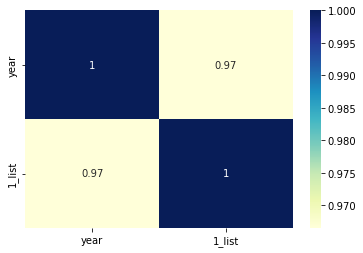

In [58]:
# let's check the correlation between the two variables
sns.heatmap(dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid'][['year', '1_list']].corr(), cmap='YlGnBu', annot=True)
plt.show()

In [59]:
# OJO EL EJEMPLO LO ESTOY HACIENDO CON TODOS LOS DATOS QUE YA CONOZOCO, LO SUYO ES QUITAR 2021 (VALOR QUE CONOZCO) Y VER EL VALOR QUE ME SALDRIA - ES DECIR TRAIN TEST(2021)
# Y EVALUAR EL MODELO, HACER CROSS VALIDATION (mas robusto ya que es una media, mas robusto del train test split)


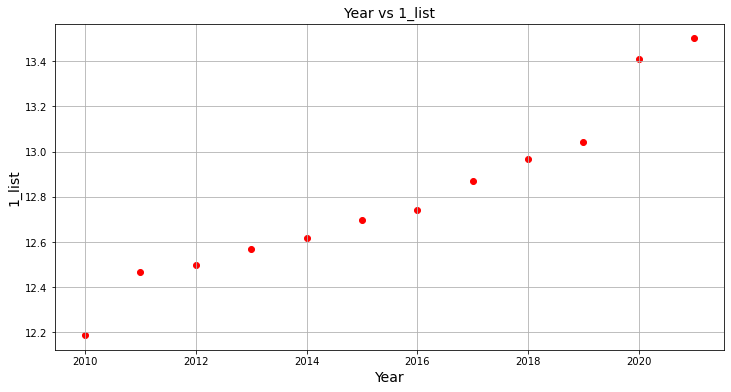

In [60]:
plt.figure(figsize=(12,6))
plt.scatter(dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']['year'], dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']['1_list'], color='red')
plt.title('Year vs 1_list', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('1_list', fontsize = 14)
plt.grid(True)
plt.show()

In [61]:
dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade
29,29,2010,universidad complutense de madrid,12.022,12.189,True,madrid,0.0,0.000000,0.000000,0.167
64,30,2011,universidad complutense de madrid,12.354,12.469,True,madrid,0.0,0.022972,0.027616,0.115
97,31,2012,universidad complutense de madrid,12.499,12.499,True,madrid,0.0,0.002406,0.011737,0.000
129,29,2013,universidad complutense de madrid,12.435,12.571,True,madrid,0.0,0.005760,-0.005120,0.136
164,30,2014,universidad complutense de madrid,12.615,12.617,True,madrid,0.0,0.003659,0.014475,0.002
198,30,2015,universidad complutense de madrid,12.697,12.697,True,madrid,0.0,0.006341,0.006500,0.000
228,24,2016,universidad complutense de madrid,12.599,12.742,True,madrid,0.0,0.003544,-0.007718,0.143
270,31,2017,universidad complutense de madrid,12.871,12.871,True,madrid,0.0,0.010124,0.021589,0.000
306,32,2018,universidad complutense de madrid,12.966,12.966,True,madrid,0.0,0.007381,0.007381,0.000
341,32,2019,universidad complutense de madrid,13.044,13.044,True,madrid,0.0,0.006016,0.006016,0.000


In [62]:
lr = LinearRegression()
X_train = dfs_unified[(dfs_unified['university'] == 'universidad complutense de madrid') & (dfs_unified['year'] != 2015)][['year', 'covid_format_change', 'growth_1_list']]
y_train = dfs_unified[(dfs_unified['university'] == 'universidad complutense de madrid') & (dfs_unified['year'] != 2015)][['1_list']]

X_test = dfs_unified[(dfs_unified['university'] == 'universidad complutense de madrid') & (dfs_unified['year'] == 2015)][['year', 'covid_format_change', 'growth_1_list']]
y_test = dfs_unified[(dfs_unified['university'] == 'universidad complutense de madrid') & (dfs_unified['year'] == 2015)][['1_list']]

lr.fit(X_train, y_train)


y_predict = lr.predict(X_test)
print('predicted score for 2015 is ', float(y_predict))
print('real score of 2015 is ', y_test['1_list'].values[0])

predicted score for 2015 is  12.707638311073566
real score of 2015 is  12.697


In [63]:
float(y_predict) - y_test['1_list'].values[0]

0.010638311073567053

In [64]:
# HACER EXPONENTIAL SMOOTHING - ARIMA

In [65]:
# Create a Linear regression

lr = LinearRegression()
X = dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid'][['year', 'covid_format_change', 'growth_1_list']]
y = dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid'][['1_list']]

lr.fit(X, y)

LinearRegression()

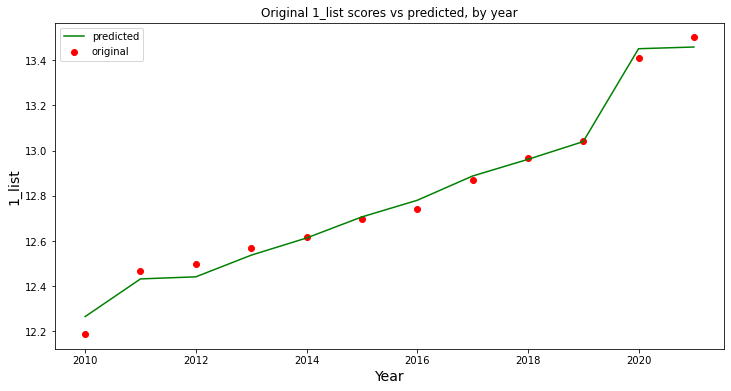

In [66]:
# generate model prediction for all years in dataset
y_predict = lr.predict(X)

# visualize the predicted score as a line on the test set
plt.figure(figsize=(12,6))
plt.scatter(dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']['year'], dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']['1_list'], color = 'red', label = 'original')
plt.plot(dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']['year'], y_predict, color='g', label = 'predicted')
plt.xlabel('Year', fontsize = 14)
plt.ylabel('1_list', fontsize = 14)
plt.title('Original 1_list scores vs predicted, by year')
plt.legend()
plt.show()

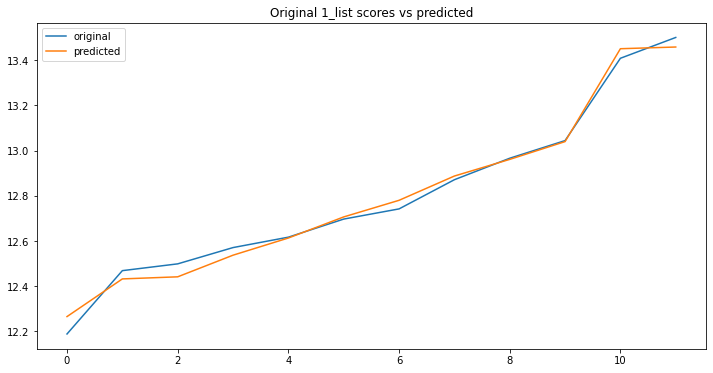

In [67]:
# compare model predictions vs actual values
plt.figure(figsize=(12,6))
x_ax = range(len(dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']['1_list']))
plt.plot(x_ax, dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']['1_list'], label='original')
plt.plot(x_ax, y_predict, label='predicted')
plt.title('Original 1_list scores vs predicted')
plt.legend()
plt.show()

## Evaluate model

In [68]:
# evaluate model
from sklearn.metrics import r2_score

r2_score(y, y_predict)
# OJO EL EJEMPLO LO ESTOY HACIENDO CON TODOS LOS DATOS QUE YA CONOZOCO, LO SUYO ES QUITAR 2021 (VALOR QUE CONOZCO) Y VER EL VALOR QUE ME SALDRIA - ES DECIR TRAIN TEST(2021)
# Y EVALUAR EL MODELO, HACER CROSS VALIDATION

# HACER
# There are three primary metrics used to evaluate linear models. These are: Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE).

0.9894809791230086

## Predict next year scores

In [69]:
# predict 1_list for a given year

# supposing the same growth as last year
complu_1_list_score = float(lr.predict([[2022, 1.0, dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']['growth_1_list'][-1:].mean()]]))
complu_1_list_score

13.541302334899285

## Save 2022 predicted scores

In [70]:
uni_names = {'university': list_of_uni_names_2021}
pred_y_df = pd.DataFrame(uni_names, columns=['university'])
pred_y_df['year'] = 2022
pred_y_df['1_list'] = ''
pred_y_df['1_list'] = np.where(pred_y_df['university'] == 'universidad complutense de madrid', complu_1_list_score, pred_y_df['1_list'])
pred_y_df

,university,year,1_list
0,universidad complutense de madrid,2022,13.541302
1,universidad de sevilla,2022,
2,universidad de murcia,2022,
3,universidad de granada,2022,
4,u. autónoma de madrid,2022,
5,universidad de málaga,2022,
6,universidad de córdoba,2022,
7,universidad de cádiz,2022,
8,u. miguel hernández (s. juan de alicante),2022,
9,u. de c-la mancha (campus c.real),2022,


In [71]:
# we have done this for 1 university, let's automate it for the rest

In [72]:
dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade
29,29,2010,universidad complutense de madrid,12.022,12.189,True,madrid,0.0,0.000000,0.000000,0.167
64,30,2011,universidad complutense de madrid,12.354,12.469,True,madrid,0.0,0.022972,0.027616,0.115
97,31,2012,universidad complutense de madrid,12.499,12.499,True,madrid,0.0,0.002406,0.011737,0.000
129,29,2013,universidad complutense de madrid,12.435,12.571,True,madrid,0.0,0.005760,-0.005120,0.136
164,30,2014,universidad complutense de madrid,12.615,12.617,True,madrid,0.0,0.003659,0.014475,0.002
198,30,2015,universidad complutense de madrid,12.697,12.697,True,madrid,0.0,0.006341,0.006500,0.000
228,24,2016,universidad complutense de madrid,12.599,12.742,True,madrid,0.0,0.003544,-0.007718,0.143
270,31,2017,universidad complutense de madrid,12.871,12.871,True,madrid,0.0,0.010124,0.021589,0.000
306,32,2018,universidad complutense de madrid,12.966,12.966,True,madrid,0.0,0.007381,0.007381,0.000
341,32,2019,universidad complutense de madrid,13.044,13.044,True,madrid,0.0,0.006016,0.006016,0.000


In [73]:
dfs_unified

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade
0,0,2010,universidad de lérida,11.040,11.654,True,lérida,0.0,0.000000,0.000000,0.614
1,1,2010,universidad de gerona,11.070,11.610,True,gerona,0.0,0.000000,0.000000,0.540
2,2,2010,universidad rovira i virgili (reus),11.142,11.708,True,reus,0.0,0.000000,0.000000,0.566
3,3,2010,u. de zaragoza (campus huesca),11.190,12.059,True,huesca,0.0,0.000000,0.000000,0.869
4,4,2010,universidad autónoma de barcelona,11.195,11.590,True,barcelona,0.0,0.000000,0.000000,0.395
...,...,...,...,...,...,...,...,...,...,...,...
413,30,2021,u. pompeu fabra (barcelona),12.758,13.098,True,barcelona,1.0,0.004294,0.012700,0.340
414,31,2021,universidad autónoma de barcelona,12.751,12.828,True,barcelona,1.0,0.008649,0.006870,0.077
415,32,2021,universidad de gerona,12.717,12.774,True,gerona,1.0,0.008049,0.013388,0.057
416,33,2021,universidad de lérida,12.711,12.799,True,lérida,1.0,0.009385,0.014850,0.088


In [74]:
# PROBAR SI ES MEJOR:
# 1) HACER LINEAR REGRESSION DE TODOS LOS DATOS
# 2) FILTRANDO POR UNIVERSIDAD Y SACAR VARIOS MODELOS (LO QUE YA TENGO)
# 3) UNIVERSIDAD ONEHOT ENCODING (COLUMNAS) Y METER EL NOMBRE DE LA UNI COMO VARIABLE EN EL MODELO
# ELEGIRÉ EL QUE MEJOR RENDIMIENTO TENGA

In [75]:
def predict_and_save_scores(year, covid_format_change, university, convocatory):
    '''
    explicar
    '''
    lr = LinearRegression()
    X = dfs_unified[dfs_unified['university'] == university][['year', 'covid_format_change', 'growth_' + convocatory]]
    y = dfs_unified[dfs_unified['university'] == university][[convocatory]]

    # train
    lr.fit(X, y)
    
    # predict, supposing same growth as last year
    pred_y_df[convocatory] = np.where(pred_y_df['university'] == university, float(lr.predict([[year, covid_format_change, dfs_unified[dfs_unified['university'] == university]['growth_' + convocatory][-1:].mean()]])), pred_y_df[convocatory])

In [76]:
for uni in list_of_uni_names_2021:
    predict_and_save_scores(2022, 1.0, uni, '1_list')

#pred_y_df['final_grade'] = ''
#for uni in list_of_uni_names_2021:
    #predict_and_save_scores(2022, 1.0, uni, 'final_grade')

In [77]:
# problema: 1_list no puede ser menor que final_grade | lo calculamos sin utilizar el modelo, cogemos el decrecimiento del último año y se lo restamos a 1_list predicted
pred_y_df['final_grade'] = ''

for uni in list_of_uni_names_2021:
    pred_y_df['final_grade'] = np.where(pred_y_df['university'] == uni, pred_y_df['1_list'] - dfs_unified[dfs_unified['university'] == uni]['diff_1_list_final_grade'][-1:].mean(), pred_y_df['final_grade'])

In [78]:
pred_y_df['diff_1_list_final_grade'] = pred_y_df['1_list'] - pred_y_df['final_grade']

In [79]:
pred_y_df

,university,year,1_list,final_grade,diff_1_list_final_grade
0,universidad complutense de madrid,2022,13.541302,13.467302,0.074
1,universidad de sevilla,2022,13.566611,13.381611,0.185
2,universidad de murcia,2022,13.548674,13.335674,0.213
3,universidad de granada,2022,13.583027,13.322027,0.261
4,u. autónoma de madrid,2022,13.548856,13.394856,0.154
5,universidad de málaga,2022,13.495228,13.294228,0.201
6,universidad de córdoba,2022,13.459792,13.259792,0.2
7,universidad de cádiz,2022,13.45875,13.26075,0.198
8,u. miguel hernández (s. juan de alicante),2022,13.430225,13.161225,0.269
9,u. de c-la mancha (campus c.real),2022,13.453345,13.178345,0.275


In [80]:
# append predicted scores to dfs_unified

dfs_unified = dfs_unified.append(pred_y_df)

In [81]:
dfs_unified

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade
0,0.0,2010,universidad de lérida,11.04,11.654,True,lérida,0.0,0.0,0.0,0.614
1,1.0,2010,universidad de gerona,11.07,11.61,True,gerona,0.0,0.0,0.0,0.54
2,2.0,2010,universidad rovira i virgili (reus),11.142,11.708,True,reus,0.0,0.0,0.0,0.566
3,3.0,2010,u. de zaragoza (campus huesca),11.19,12.059,True,huesca,0.0,0.0,0.0,0.869
4,4.0,2010,universidad autónoma de barcelona,11.195,11.59,True,barcelona,0.0,0.0,0.0,0.395
...,...,...,...,...,...,...,...,...,...,...,...
30,NaN,2022,u. pompeu fabra (barcelona),12.786537,13.126537,NaN,NaN,NaN,NaN,NaN,0.34
31,NaN,2022,universidad autónoma de barcelona,12.758729,12.835729,NaN,NaN,NaN,NaN,NaN,0.077
32,NaN,2022,universidad de gerona,12.730788,12.787788,NaN,NaN,NaN,NaN,NaN,0.057
33,NaN,2022,universidad de lérida,12.720025,12.808025,NaN,NaN,NaN,NaN,NaN,0.088


In [82]:
# aplicar columnas de feature engineering

In [83]:
# forecasting: machine learning vs arima. por ahora he hecho machine learning

In [84]:
# PROBAR OTROS MODELOS - LM, GLM

In [85]:
# toni me dice hacer random forest, que probablemente sea mejor que una regresion lineal. Minimo tengo que hacer estos 2 modelos. Si me da tiempo xgboost

In [86]:
# toni: poner al final - cosas que podrian mejorar el modelo si hubiese tenido estos datos: numero de plazas

# Data Visualization

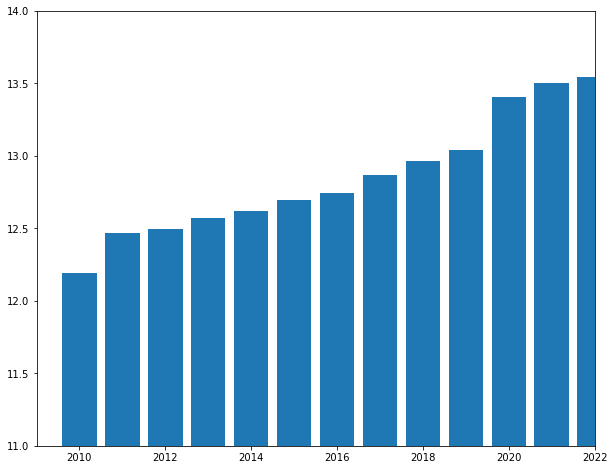

In [87]:
complutense = dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']
fig,ax=plt.subplots(figsize=(10,8))
ax.bar(complutense['year'], complutense['1_list'])
# Setting the x-axis to 1-10
# and y-axis to 1-15
plt.axis([2009, 2022, 11.00, 14.00])
plt.show()

In [88]:
dfs_unified.head()

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade
0,0.0,2010,universidad de lérida,11.04,11.654,True,lérida,0.0,0.0,0.0,0.614
1,1.0,2010,universidad de gerona,11.07,11.61,True,gerona,0.0,0.0,0.0,0.54
2,2.0,2010,universidad rovira i virgili (reus),11.142,11.708,True,reus,0.0,0.0,0.0,0.566
3,3.0,2010,u. de zaragoza (campus huesca),11.19,12.059,True,huesca,0.0,0.0,0.0,0.869
4,4.0,2010,universidad autónoma de barcelona,11.195,11.59,True,barcelona,0.0,0.0,0.0,0.395


In [89]:
# Shorter name of universities - PUT HIGHERRR
dfs_unified['university'] = dfs_unified['university'].replace('universidad', 'u.', regex=True)

In [90]:
# round numbers to 3 decimals
dfs_unified['1_list'] = dfs_unified['1_list'].apply(lambda x: round(x, 3))
dfs_unified['final_grade'] = dfs_unified['final_grade'].apply(lambda x: round(x, 3))
dfs_unified['diff_1_list_final_grade'] = dfs_unified['diff_1_list_final_grade'].apply(lambda x: round(x, 3))
dfs_unified['growth_1_list'] = dfs_unified['growth_1_list'].apply(lambda x: round(x, 3))
dfs_unified['growth_final_grade'] = dfs_unified['growth_final_grade'].apply(lambda x: round(x, 3))

In [91]:
dfs_unified.head()

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade
0,0.0,2010,u. de lérida,11.040,11.654,True,lérida,0.0,0.0,0.0,0.614
1,1.0,2010,u. de gerona,11.070,11.610,True,gerona,0.0,0.0,0.0,0.540
2,2.0,2010,u. rovira i virgili (reus),11.142,11.708,True,reus,0.0,0.0,0.0,0.566
3,3.0,2010,u. de zaragoza (campus huesca),11.190,12.059,True,huesca,0.0,0.0,0.0,0.869
4,4.0,2010,u. autónoma de barcelona,11.195,11.590,True,barcelona,0.0,0.0,0.0,0.395


In [92]:
dfs_unified['city'].unique()

array(['lérida', 'gerona', 'reus', 'huesca', 'barcelona', 'valladolid',
       'santander', 'santiago de compostela', 'badajoz', 'cádiz',
       'salamanca', 'zaragoza', 'ciudad real', 'córdoba', 'bilbao',
       'albacete', 'sevilla', 'alicante', 'alcalá', 'málaga', 'murcia',
       'la laguna', 'madrid', 'valencia', 'las palmas', 'granada',
       'oviedo', 'castellon de la plana', 'palma de mallorca', 'navarra',
       nan], dtype=object)

In [93]:
# CCAA - communities
dfs_unified['CCAA'] = ''
dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['huesca', 'zaragoza']), 'Aragón', dfs_unified['CCAA'])
dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['lérida', 'gerona', 'reus', 'barcelona']), 'Cataluña', dfs_unified['CCAA'])
dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['madrid', 'alcalá']), 'Comunidad de Madrid', dfs_unified['CCAA'])
dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['valladolid', 'salamanca']), 'Castilla y León', dfs_unified['CCAA'])
dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['santander']), 'Cantabria', dfs_unified['CCAA'])
dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['santiago de compostela']), 'Galicia', dfs_unified['CCAA'])
dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['badajoz']), 'Extremadura', dfs_unified['CCAA'])
dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['cádiz', 'córdoba', 'sevilla', 'alicante', 'málaga', 'murcia', 'granada']), 'Andalucía', dfs_unified['CCAA'])
dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['ciudad real', 'albacete']), 'Castilla-La Mancha', dfs_unified['CCAA'])
dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['bilbao']), 'País Vasco', dfs_unified['CCAA'])
dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['la laguna', 'las palmas']), 'Canarias', dfs_unified['CCAA'])
dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['valencia', 'castellon de la plana']), 'Comunitat Valenciana', dfs_unified['CCAA'])
dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['oviedo']), 'Principado de Asturias', dfs_unified['CCAA'])
dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['palma de mallorca']), 'Illes Balears', dfs_unified['CCAA'])
dfs_unified['CCAA'] = np.where(dfs_unified['city'].isin(['navarra']), 'Comunidad Foral de Navarra', dfs_unified['CCAA'])

In [94]:
dfs_unified[dfs_unified['CCAA'] == '']

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade,CCAA
0,NaN,2022,u. complutense de madrid,13.467,13.541,NaN,NaN,NaN,NaN,NaN,0.074,
1,NaN,2022,u. de sevilla,13.382,13.567,NaN,NaN,NaN,NaN,NaN,0.185,
2,NaN,2022,u. de murcia,13.336,13.549,NaN,NaN,NaN,NaN,NaN,0.213,
3,NaN,2022,u. de granada,13.322,13.583,NaN,NaN,NaN,NaN,NaN,0.261,
4,NaN,2022,u. autónoma de madrid,13.395,13.549,NaN,NaN,NaN,NaN,NaN,0.154,
5,NaN,2022,u. de málaga,13.294,13.495,NaN,NaN,NaN,NaN,NaN,0.201,
6,NaN,2022,u. de córdoba,13.260,13.460,NaN,NaN,NaN,NaN,NaN,0.200,
7,NaN,2022,u. de cádiz,13.261,13.459,NaN,NaN,NaN,NaN,NaN,0.198,
8,NaN,2022,u. miguel hernández (s. juan de alicante),13.161,13.430,NaN,NaN,NaN,NaN,NaN,0.269,
9,NaN,2022,u. de c-la mancha (campus c.real),13.178,13.453,NaN,NaN,NaN,NaN,NaN,0.275,


In [95]:
dfs_unified['CCAA'].unique()

array(['Cataluña', 'Aragón', 'Castilla y León', 'Cantabria', 'Galicia',
       'Extremadura', 'Andalucía', 'Castilla-La Mancha', 'País Vasco',
       'Comunidad de Madrid', 'Canarias', 'Comunitat Valenciana',
       'Principado de Asturias', 'Illes Balears',
       'Comunidad Foral de Navarra', ''], dtype=object)

In [96]:
grouped = dfs_unified.groupby('CCAA')['final_grade'].mean().reset_index()
grouped

,CCAA,final_grade
0,,13.054514
1,Andalucía,12.529429
2,Aragón,12.192708
3,Canarias,12.476375
4,Cantabria,12.131750
5,Castilla y León,12.210958
6,Castilla-La Mancha,12.383917
7,Cataluña,12.103986
8,Comunidad Foral de Navarra,12.845000
9,Comunidad de Madrid,12.600062


In [97]:
# growth columns, replace first score (0 to Nan) - not all started in 2010


In [98]:
# apply new columns created to 2022 data


In [99]:
# compare growth of all years except for 2020, and 2020
grouped_year_1_list = dfs_unified.groupby('year')['growth_1_list'].mean().reset_index()
grouped_year_1_list_not_2020 = grouped_year_1_list[grouped_year_1_list['year'] != 2020]
grouped_year_1_list_2020 = grouped_year_1_list[grouped_year_1_list['year'] == 2020]
print(grouped_year_1_list_not_2020['growth_1_list'].mean())
print(grouped_year_1_list_2020['growth_1_list'].mean())
print(grouped_year_1_list_2020['growth_1_list'].mean() / grouped_year_1_list_not_2020['growth_1_list'].mean())

0.00521438988818668
0.031971428571428574
6.131384353107269


In [100]:
#!pip install streamlit

In [101]:
#!streamlit run /Users/miguel/repos/Prediction_Medicine_Selectivity_Scores/streamlit/myapp.py

In [102]:
#!pip install folium
#!pip install geopandas
import streamlit as st
import folium as folium
import geopandas as gpd
from shapely.geometry import Point, Polygon
import re
import json

In [103]:
import os
os.getcwd()

'/Users/miguel/repos/Prediction_Medicine_Selectivity_Scores'

# end data visualization

In [104]:
def create_marker(map, latitude, longitude, popup_info, tooltip_info, color_marked):
   folium.Marker(
      location=[latitude, longitude], # coordinates for the marker (Earth Lab at CU Boulder)
      popup=popup_info, # pop-up label for the marker,
      tooltip=tooltip_info , # tooltip label for the marker
      icon=folium.Icon(color=color_marked)).add_to(map)

In [105]:
dfs_unified['university'].unique()

array(['u. de lérida', 'u. de gerona', 'u. rovira i virgili (reus)',
       'u. de zaragoza (campus huesca)', 'u. autónoma de barcelona',
       'u. de valladolid', 'u. de cantabria (santander)',
       'u. de santiago de compostela', 'u. de extremadura (badajoz)',
       'u. de cádiz', 'u. pompeu fabra (barcelona)',
       'u. de barcelona-clínico', 'u. de salamanca',
       'u. de zaragoza (campus zaragoza)',
       'u. de c-la mancha (campus c.real)', 'u. de córdoba',
       'u. del país vasco (lejona)',
       'u. de c-la mancha (campus albacete)', 'u. de sevilla',
       'u. miguel hernández (s. juan de alicante)', 'u. de alcalá',
       'u. de málaga', 'u. de murcia', 'u. de la laguna',
       'urjc - campus alcorcón', 'u. de valencia',
       'u. autónoma de madrid', 'u. de las palmas', 'u. de granada',
       'u. complutense de madrid', 'u. de oviedo', 'u. jaume i',
       'u. de las islas baleares', 'u. pública de navarra',
       'u. de barcelona-bellvitge'], dtype=object)

In [106]:
dfs_unified['latitude'] = ''
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. autónoma de barcelona', 41.5025932, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de lérida', 41.81636125, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de gerona', 41.9743792, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. rovira i virgili (reus)', 41.155309, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de zaragoza (campus huesca)', 42.1414059, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de valladolid', 41.6105937, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de cantabria (santander)', 43.4736983, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de santiago de compostela', 42.88050025, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de extremadura (badajoz)', 38.8824069, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de cádiz', 36.5340199, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. pompeu fabra (barcelona)', 41.37921475, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de barcelona-clínico', 41.39017434, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de salamanca', 40.9666432, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de zaragoza (campus zaragoza)', 41.6421312, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de c-la mancha (campus c.real)', 38.9918372, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de córdoba', 37.8560421, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. del país vasco (lejona)', 43.3359821, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de c-la mancha (campus albacete)', 38.4527362, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de sevilla', 37.4128557, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. miguel hernández (s. juan de alicante)', 38.39896277, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de alcalá', 40.4818396, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de málaga', 36.7200431, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de murcia', 37.99109245, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de la laguna', 28.4852475, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'urjc - campus alcorcón', 40.3506324, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de valencia', 39.4786642, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. autónoma de madrid', 40.4832261, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de las palmas', 28.09055808, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de granada', 37.1474408, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. complutense de madrid', 40.4437398, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de oviedo', 43.3533657, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. jaume i', 39.9899483, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de las islas baleares', 39.60701435, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. pública de navarra', 42.8154264, dfs_unified['latitude'])
dfs_unified['latitude'] = np.where(dfs_unified['university'] == 'u. de barcelona-bellvitge', 41.3507816, dfs_unified['latitude'])

In [107]:
dfs_unified['longitude'] = ''
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. autónoma de barcelona', 2.080056, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de lérida', 1.59713745, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de gerona', 2.8235429, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. rovira i virgili (reus)', 1.1053273, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de zaragoza (campus huesca)', -0.4060896, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de valladolid', -4.6916619, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de cantabria (santander)', -3.7859174, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de santiago de compostela', -8.5457602, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de extremadura (badajoz)', -7.0194457, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de cádiz', -6.3018987, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. pompeu fabra (barcelona)', 2.17941527, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de barcelona-clínico', 2.15212588, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de salamanca', -5.6772757, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de zaragoza (campus zaragoza)', -0.90302271, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de c-la mancha (campus c.real)', -3.9268263, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de córdoba', -4.8134452, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. del país vasco (lejona)', -2.9768285, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de c-la mancha (campus albacete)', -2.05363374, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de sevilla', -5.9845606, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. miguel hernández (s. juan de alicante)', -0.43477806, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de alcalá', -3.3644973, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de málaga', -4.41617939, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de murcia', -1.13010405, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de la laguna', -16.3126059, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'urjc - campus alcorcón', -3.8437926, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de valencia', -0.3627246, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. autónoma de madrid', -3.6972262, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de las palmas', -15.41890014, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de granada', -3.6042349, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. complutense de madrid', -3.72614639, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de oviedo', -5.8687712, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. jaume i', -0.0664218, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de las islas baleares', 2.64475448, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. pública de navarra', -1.65263107, dfs_unified['longitude'])
dfs_unified['longitude'] = np.where(dfs_unified['university'] == 'u. de barcelona-bellvitge', 2.1045067, dfs_unified['longitude'])

In [108]:
dfs_unified[dfs_unified['latitude'] == '']

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade,CCAA,latitude,longitude


In [109]:
float(dfs_unified.loc[dfs_unified['university'] == 'u. autónoma de barcelona', 'latitude'].unique())

41.5025932

In [110]:
latitude = dfs_unified.loc[dfs_unified['university'] == 'u. autónoma de barcelona', 'latitude'].mean()

In [111]:
latitude

41.50259319999999

In [112]:
dfs_unified.columns

Index(['index', 'year', 'university', 'final_grade', '1_list', 'since_2010',
       'city', 'covid_format_change', 'growth_1_list', 'growth_final_grade',
       'diff_1_list_final_grade', 'CCAA', 'latitude', 'longitude'],
      dtype='object')

In [113]:
import os
os.getcwd()

'/Users/miguel/repos/Prediction_Medicine_Selectivity_Scores'

In [114]:
dfs_unified

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade,CCAA,latitude,longitude
0,0.0,2010,u. de lérida,11.040,11.654,True,lérida,0.0,0.0,0.0,0.614,Cataluña,41.816361,1.597137
1,1.0,2010,u. de gerona,11.070,11.610,True,gerona,0.0,0.0,0.0,0.540,Cataluña,41.974379,2.823543
2,2.0,2010,u. rovira i virgili (reus),11.142,11.708,True,reus,0.0,0.0,0.0,0.566,Cataluña,41.155309,1.105327
3,3.0,2010,u. de zaragoza (campus huesca),11.190,12.059,True,huesca,0.0,0.0,0.0,0.869,Aragón,42.141406,-0.40609
4,4.0,2010,u. autónoma de barcelona,11.195,11.590,True,barcelona,0.0,0.0,0.0,0.395,Cataluña,41.502593,2.080056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,NaN,2022,u. pompeu fabra (barcelona),12.787,13.127,NaN,NaN,NaN,NaN,NaN,0.340,,41.379215,2.179415
31,NaN,2022,u. autónoma de barcelona,12.759,12.836,NaN,NaN,NaN,NaN,NaN,0.077,,41.502593,2.080056
32,NaN,2022,u. de gerona,12.731,12.788,NaN,NaN,NaN,NaN,NaN,0.057,,41.974379,2.823543
33,NaN,2022,u. de lérida,12.720,12.808,NaN,NaN,NaN,NaN,NaN,0.088,,41.816361,1.597137


In [115]:
dfs_unified[dfs_unified['1_list'].isnull()]

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade,CCAA,latitude,longitude


In [116]:
dfs_unified[dfs_unified['final_grade'].isnull()]

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade,CCAA,latitude,longitude


In [117]:
dfs_unified[dfs_unified['latitude'].isnull()]

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade,CCAA,latitude,longitude


In [118]:
dfs_unified[dfs_unified['longitude'].isnull()]

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade,CCAA,latitude,longitude


In [119]:
dfs_unified[dfs_unified['growth_1_list'].isnull()]

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade,CCAA,latitude,longitude
0,NaN,2022,u. complutense de madrid,13.467,13.541,NaN,NaN,NaN,NaN,NaN,0.074,,40.44374,-3.726146
1,NaN,2022,u. de sevilla,13.382,13.567,NaN,NaN,NaN,NaN,NaN,0.185,,37.412856,-5.984561
2,NaN,2022,u. de murcia,13.336,13.549,NaN,NaN,NaN,NaN,NaN,0.213,,37.991092,-1.130104
3,NaN,2022,u. de granada,13.322,13.583,NaN,NaN,NaN,NaN,NaN,0.261,,37.147441,-3.604235
4,NaN,2022,u. autónoma de madrid,13.395,13.549,NaN,NaN,NaN,NaN,NaN,0.154,,40.483226,-3.697226
5,NaN,2022,u. de málaga,13.294,13.495,NaN,NaN,NaN,NaN,NaN,0.201,,36.720043,-4.416179
6,NaN,2022,u. de córdoba,13.260,13.460,NaN,NaN,NaN,NaN,NaN,0.200,,37.856042,-4.813445
7,NaN,2022,u. de cádiz,13.261,13.459,NaN,NaN,NaN,NaN,NaN,0.198,,36.53402,-6.301899
8,NaN,2022,u. miguel hernández (s. juan de alicante),13.161,13.430,NaN,NaN,NaN,NaN,NaN,0.269,,38.398963,-0.434778
9,NaN,2022,u. de c-la mancha (campus c.real),13.178,13.453,NaN,NaN,NaN,NaN,NaN,0.275,,38.991837,-3.926826


In [120]:
dfs_unified[dfs_unified['university'] == 'u. de las islas baleares']

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade,CCAA,latitude,longitude
205,1.0,2016,u. de las islas baleares,12.144,12.534,False,palma de mallorca,0.0,0.000,0.000,0.390,Illes Balears,39.607014,2.644754
241,2.0,2017,u. de las islas baleares,12.112,12.744,False,palma de mallorca,0.0,0.017,-0.003,0.632,Illes Balears,39.607014,2.644754
274,0.0,2018,u. de las islas baleares,12.120,12.568,False,palma de mallorca,0.0,-0.014,0.001,0.448,Illes Balears,39.607014,2.644754
312,3.0,2019,u. de las islas baleares,12.209,12.622,False,palma de mallorca,0.0,0.004,0.007,0.413,Illes Balears,39.607014,2.644754
375,30.0,2020,u. de las islas baleares,12.636,13.106,False,palma de mallorca,1.0,0.038,0.035,0.470,Illes Balears,39.607014,2.644754
412,29.0,2021,u. de las islas baleares,12.760,13.225,False,palma de mallorca,1.0,0.009,0.010,0.465,Illes Balears,39.607014,2.644754
29,NaN,2022,u. de las islas baleares,12.713,13.178,NaN,NaN,NaN,NaN,NaN,0.465,,39.607014,2.644754


In [121]:
dfs_unified[dfs_unified['university'] == 'u. pública de navarra']

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade,CCAA,latitude,longitude
325,16.0,2019,u. pública de navarra,12.500,12.707,False,navarra,0.0,0.000,0.000,0.207,Comunidad Foral de Navarra,42.815426,-1.652631
361,16.0,2020,u. pública de navarra,12.949,13.318,False,navarra,1.0,0.048,0.036,0.369,Comunidad Foral de Navarra,42.815426,-1.652631
398,15.0,2021,u. pública de navarra,13.086,13.247,False,navarra,1.0,-0.005,0.011,0.161,Comunidad Foral de Navarra,42.815426,-1.652631
15,NaN,2022,u. pública de navarra,13.019,13.180,NaN,NaN,NaN,NaN,NaN,0.161,,42.815426,-1.652631


In [122]:
dfs_unified[dfs_unified['university'] == 'u. de barcelona-bellvitge']

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade,CCAA,latitude,longitude
373,28.0,2020,u. de barcelona-bellvitge,12.660,12.990,False,barcelona,1.0,0.0,0.000,0.33,Cataluña,41.350782,2.104507
410,27.0,2021,u. de barcelona-bellvitge,12.878,12.988,False,barcelona,1.0,-0.0,0.017,0.11,Cataluña,41.350782,2.104507
27,NaN,2022,u. de barcelona-bellvitge,12.876,12.986,NaN,NaN,NaN,NaN,NaN,0.11,,41.350782,2.104507


In [123]:
# solo para probar
#dfs_unified = dfs_unified[dfs_unified['year'] != 2022]
dfs_unified

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade,CCAA,latitude,longitude
0,0.0,2010,u. de lérida,11.040,11.654,True,lérida,0.0,0.000,0.000,0.614,Cataluña,41.816361,1.597137
1,1.0,2010,u. de gerona,11.070,11.610,True,gerona,0.0,0.000,0.000,0.540,Cataluña,41.974379,2.823543
2,2.0,2010,u. rovira i virgili (reus),11.142,11.708,True,reus,0.0,0.000,0.000,0.566,Cataluña,41.155309,1.105327
3,3.0,2010,u. de zaragoza (campus huesca),11.190,12.059,True,huesca,0.0,0.000,0.000,0.869,Aragón,42.141406,-0.40609
4,4.0,2010,u. autónoma de barcelona,11.195,11.590,True,barcelona,0.0,0.000,0.000,0.395,Cataluña,41.502593,2.080056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.0,2021,u. pompeu fabra (barcelona),12.758,13.098,True,barcelona,1.0,0.004,0.013,0.340,Cataluña,41.379215,2.179415
414,31.0,2021,u. autónoma de barcelona,12.751,12.828,True,barcelona,1.0,0.009,0.007,0.077,Cataluña,41.502593,2.080056
415,32.0,2021,u. de gerona,12.717,12.774,True,gerona,1.0,0.008,0.013,0.057,Cataluña,41.974379,2.823543
416,33.0,2021,u. de lérida,12.711,12.799,True,lérida,1.0,0.009,0.015,0.088,Cataluña,41.816361,1.597137


In [129]:
dfs_unified.notnull()

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade,CCAA,latitude,longitude
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,True,True,True,True,True,True,True,True,True,True,True,True,True,True
414,True,True,True,True,True,True,True,True,True,True,True,True,True,True
415,True,True,True,True,True,True,True,True,True,True,True,True,True,True
416,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [125]:
dfs_unified[dfs_unified.isnull()]


,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade,CCAA,latitude,longitude
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
df_selected_year = dfs_unified[(dfs_unified['year'] == 2021)]
df_selected_year['university'].unique()

array(['u. complutense de madrid', 'u. de sevilla', 'u. de murcia',
       'u. de granada', 'u. autónoma de madrid', 'u. de málaga',
       'u. de córdoba', 'u. de cádiz',
       'u. miguel hernández (s. juan de alicante)',
       'u. de c-la mancha (campus c.real)', 'u. de alcalá',
       'u. de valladolid', 'urjc - campus alcorcón',
       'u. de c-la mancha (campus albacete)',
       'u. de extremadura (badajoz)', 'u. pública de navarra',
       'u. de valencia', 'u. jaume i', 'u. de zaragoza (campus zaragoza)',
       'u. de barcelona-clínico', 'u. de la laguna', 'u. de las palmas',
       'u. de salamanca', 'u. de zaragoza (campus huesca)',
       'u. de santiago de compostela', 'u. de oviedo',
       'u. de cantabria (santander)', 'u. de barcelona-bellvitge',
       'u. del país vasco (lejona)', 'u. de las islas baleares',
       'u. pompeu fabra (barcelona)', 'u. autónoma de barcelona',
       'u. de gerona', 'u. de lérida', 'u. rovira i virgili (reus)'],
      dtype=object)

In [137]:
dfs_unified[dfs_unified['university'] == '']

,index,year,university,final_grade,1_list,since_2010,city,covid_format_change,growth_1_list,growth_final_grade,diff_1_list_final_grade,CCAA,latitude,longitude


In [127]:
# export data to be used on streamlit

file_name = 'output/exported_data.csv'
dfs_unified.to_csv(file_name, index = False, header=True)